In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import Wide_Spectra_Pipeline as WSP
import importlib

importlib.reload(WSP)

plt.rcParams["font.family"] = "Times New Roman"

In [2]:
file = "293K_SectionA.xlsx"
sheets = ["Wide_Spectra","Peak_Spectra"]
cols = [["WS_0","WS_1","WS_2","WS_3","WS_4","WS_5","WS_6","WS_7","WS_8","WS_9"], #Wide_spectra
         ["PS_0","PS_1","PS_2","PS_3","PS_4","PS_5","PS_6","PS_7","PS_8","PS_9"] #Peak_Spectra
        ]
columns = cols[0]
start_index = [9830,9795]

def wavelength_extraction(x, start_index):
    A = 0.9958
    alpha_A = 0.0001

    B = 9096.6280
    alpha_B = 0.0289

    wavelengths = []
    uncertainties = []

    for i in range(len(x)):
        wavelength = (start_index - 0.242*x[i] - B) / A
        uncertainty = np.abs((x[i] - (B + alpha_B)) / (A + alpha_A) - wavelength)

        wavelengths.append(wavelength)
        uncertainties.append(uncertainty)

    return wavelengths

indexes_250 = np.arange(0,250,1)

wavelengths = wavelength_extraction(indexes_250,start_index[0])

print(np.shape(wavelengths))
print(np.shape(indexes_250))

(250,)
(250,)


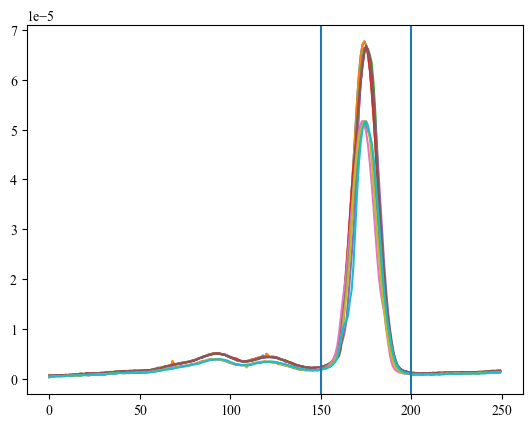

In [3]:
df_WP = pd.read_excel(file, sheets[0])

for col in cols[0]:
    plt.figure(1)
    plt.plot(indexes_250,df_WP[col],label=col)
plt.axvline(indexes_250[200])
plt.axvline(indexes_250[150])
plt.show()

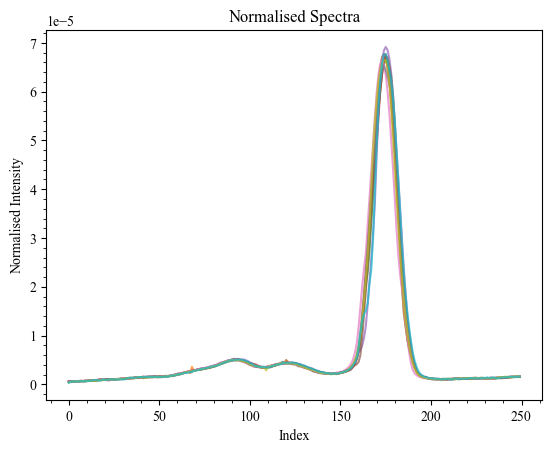

In [4]:
dx = np.abs(indexes_250[1]-indexes_250[0])

area_0 = np.sum(df_WP[columns[0]] * dx)

normalised_spectra = []

plt.figure()
for col in columns:
    spectrum = df_WP[col].to_numpy()
    norm_spec = (spectrum / np.sum(spectrum * dx)) * area_0
    normalised_spectra.append(norm_spec)
    plt.plot(indexes_250, norm_spec, alpha=0.7)

plt.xlabel("Index")
plt.ylabel("Normalised Intensity")
plt.title("Normalised Spectra")
plt.minorticks_on()
plt.show()

In [5]:
intensities = np.mean(normalised_spectra, axis=0)
intensities = intensities.flatten()

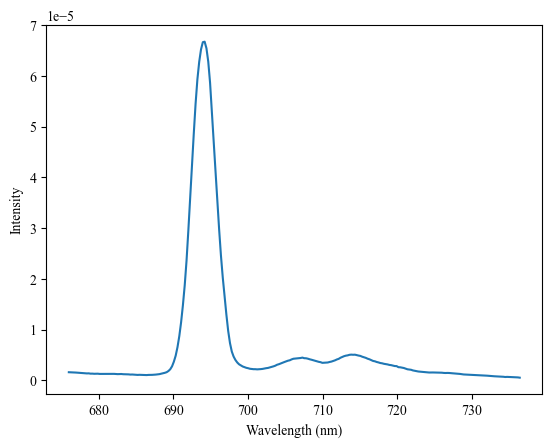

In [6]:
plt.figure(1)
plt.plot(wavelengths, intensities)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.show()

In [7]:
wavelength_peak = wavelengths[np.argmax(intensities)]

In [8]:
print(wavelength_peak)
print(np.argmax(intensities))

694.179554127334
174


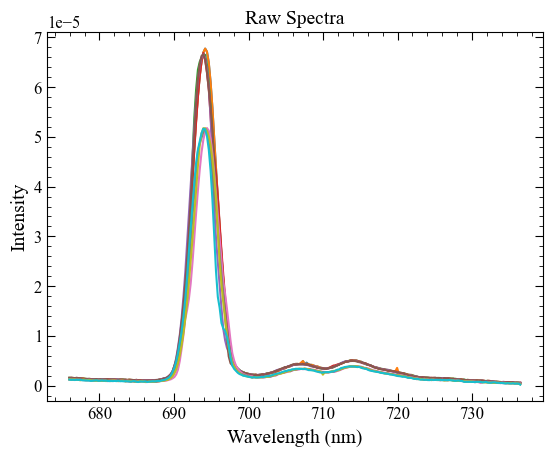

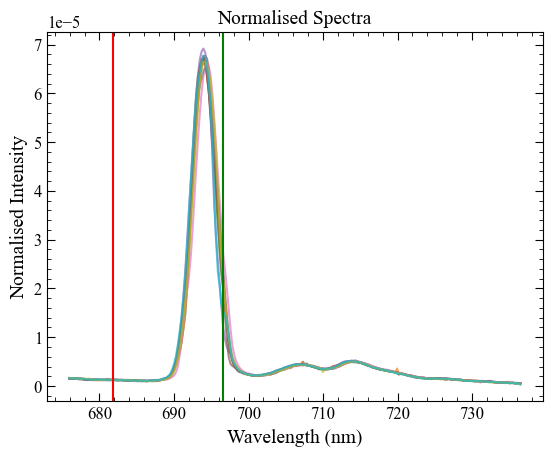

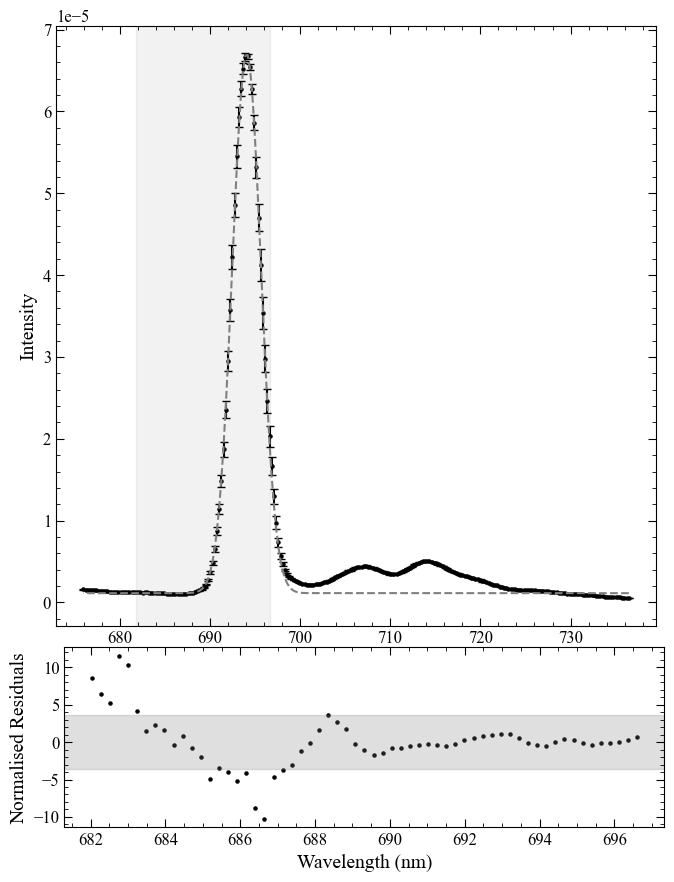

------ Summary Statistics ------
Reduced Chi Squared: 14.7217
----- R1 -----
R1 Theoretical: 694.3
R1 Observed: 694.0669 ± 0.6816753301351496
----- R2 -----
R2 Theoretical: 692.9
R2 Observed: 694.7651 ± 3312.291912478992


In [11]:
padding = padding = [164, 225]

pop, cov = WSP.run_pipeline(file, sheets[0], cols[0], 9830, padding)